<a href="https://colab.research.google.com/github/dishantzaveri/synapsesapio/blob/main/Chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install colorgram.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 16.7 MB 419 kB/s 
     |████████████████████████████████| 6.3 MB 29.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [ ]:
#code to view the map through geojson file
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import imutils
from shapely.geometry import MultiPolygon
import shapely
from PIL import Image
import colorgram

# Reading and plotting the GeoJSON file

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


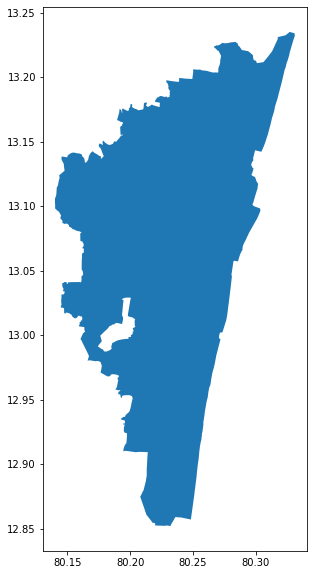

In [ ]:
gdf=gpd.read_file("/content/drive/MyDrive/Chennai.geojson")
polygon = gdf.geometry.unary_union
gdf = gpd.GeoDataFrame(geometry=[polygon], crs=gdf.crs)
gdf.plot(figsize=(10,10), edgecolor='')
plt.show()


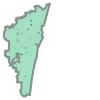

In [ ]:
gdf["geometry"][0]

### Removing the noise geojson data

In [ ]:
vector_bound_coordinates= gdf['geometry']
coordinates=vector_bound_coordinates.bounds
coordinates

,minx,miny,maxx,maxy
0,80.140177,12.851973,80.331224,13.235185


In [ ]:
minx = coordinates["minx"][0]
miny = coordinates["miny"][0]
maxx = coordinates["maxx"][0]
maxy = coordinates["maxy"][0]

### Creating the bounding box for the coordinate image

In [ ]:
width_1 = maxx - minx
height_1 = maxy-miny 
bottom_left_1 = (minx,miny)
bottom_right_1 = (maxx,miny)
top_left_1 = (minx,maxy)
top_right_1 = (maxx, maxy)

In [ ]:
print(minx, miny, maxx, maxy, height_1, width_1)

80.14017660581806 12.851972527539099 80.33122353291294 13.23518544523464 0.3832129176955412 0.19104692709488802


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


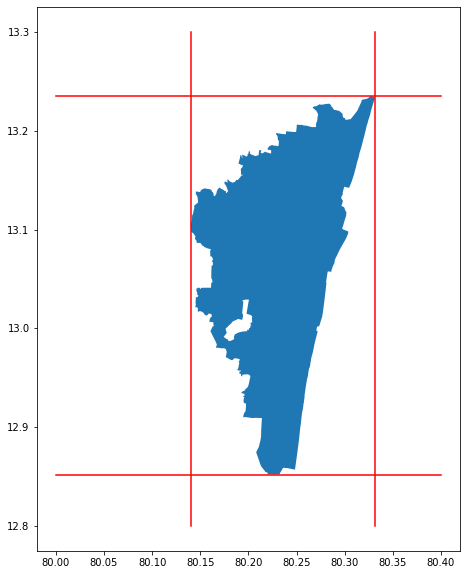

In [ ]:
gdf.plot(figsize=(10,10), edgecolor='')
x = np.linspace(80,80.4,100)
y = [miny]*100
plt.plot(x, y, '-r')
y = [maxy]*100
plt.plot(x, y, '-r')
y = np.linspace(12.8,13.3,100)
x = [maxx]*100
plt.plot(x, y, '-r')
# y = np.linspace(5,40,100)
x = [minx]*100
plt.plot(x, y, '-r')
plt.show()

# Dealing with random image of the Rajasthan Map

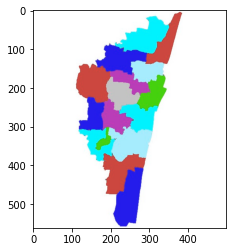

In [ ]:
image = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
plt.imshow(image)

#### Converting to grayscale

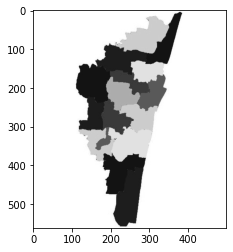

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

#### Binary image

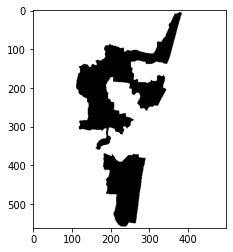

In [ ]:
# load the image, convert it to grayscale, and blur it slightly
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(thresh, cmap="gray")

#### Finding contours to get borders

In [ ]:
xmin, ymin, xmax, ymax = (5000,5000,-5000,-5000)
x,y = thresh.shape
for i in range(x):
  for j in range(y):
    if thresh[i][j] == 0:
      if i<xmin:
        xmin = i
      if j<ymin:
        ymin = j
      if i>xmax:
        xmax = i
      if j>ymax:
        ymax = j

t = ymin
ymin = xmin 
xmin = t
t = xmax
xmax = ymax
ymax = t

#### Getting the bounding box

In [ ]:
height_2 = abs(ymin-ymax)
width_2 = xmax-xmin

In [ ]:
width_2

271

In [ ]:
bottom_left = (xmin,ymin)
bottom_right = (xmax,ymin)
top_left = (xmin,ymax)
top_right = (xmax, ymax)

In [ ]:
print(xmin, ymin, xmax, ymax)

111 5 382 557


In [ ]:
print(bottom_left, bottom_right, top_left, top_right)

(111, 5) (382, 5) (111, 557) (382, 557)


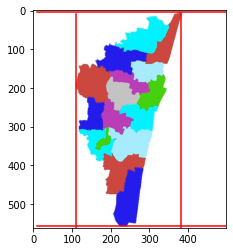

In [ ]:
image = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
x = np.linspace(10,850,100)
y = [ymin]*100
plt.plot(x, y, '-r')
y = [ymax]*100
plt.plot(x, y, '-r')
y = np.linspace(10,800,100)
x = [xmax]*100
plt.plot(x, y, '-r')
x = [xmin]*100
plt.plot(x, y, '-r')
plt.imshow(image)

#Finding the scaling factor between the two

In [ ]:
y_scale = height_1/height_2
x_scale = width_1/width_2

In [ ]:
print(y_scale)
print(x_scale)

0.000694226300173082
0.0007049702106822436


# Mapping points

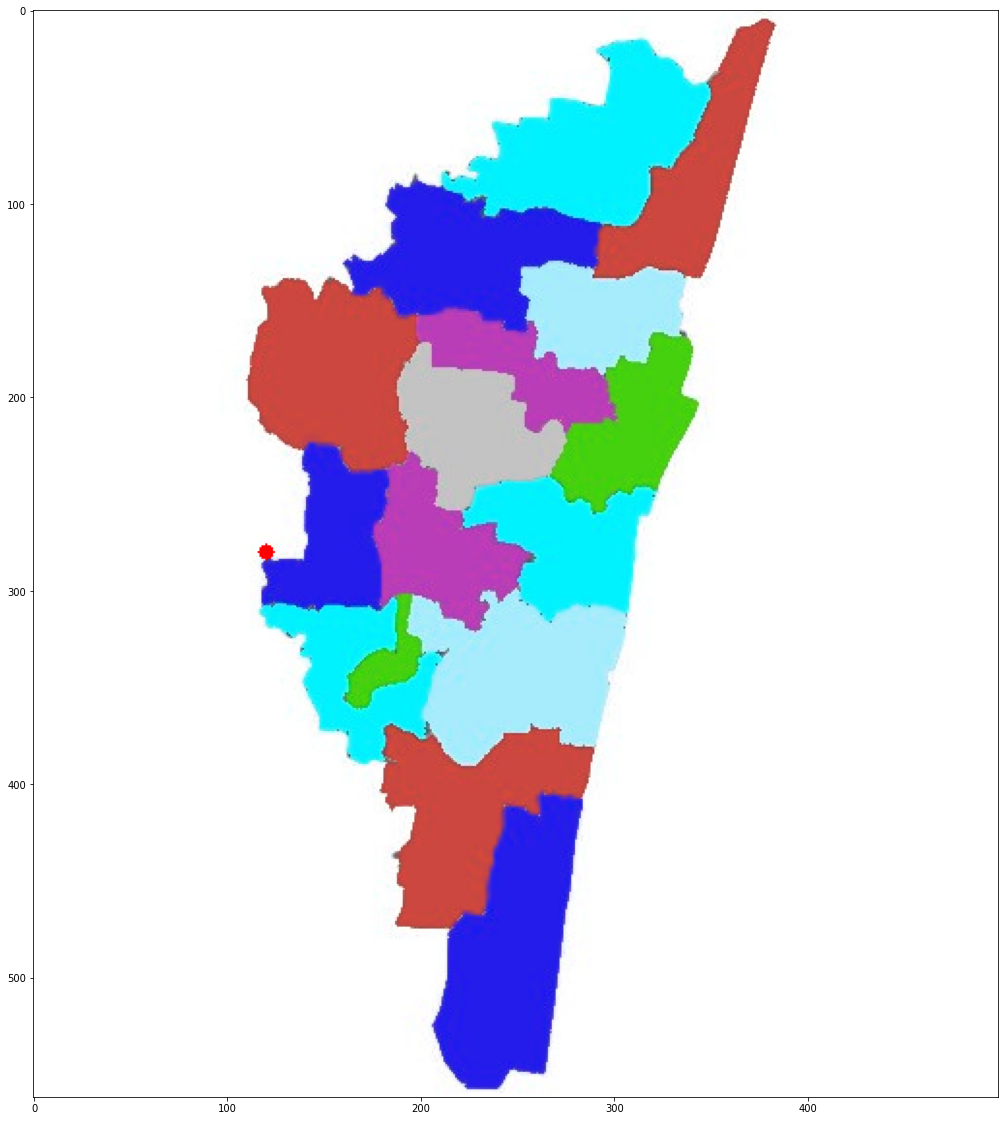

In [ ]:
#consider random point on image map (1151 2051)
im = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
cv2.circle(im, ((120,280)), 4, (255, 0, 0), -1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.imshow(im)

In [ ]:
#dist in y
ydist = ymax - 280
xdist = 120 - xmin

In [ ]:
ydist = ydist*y_scale
xdist = xdist*x_scale

In [ ]:
y_coord = miny + ydist
x_coord = minx + xdist

In [ ]:
def map(x,y):
  ydist = ymax - y
  xdist = x - xmin
  ydist = ydist*y_scale
  xdist = xdist*x_scale
  y_coord = miny + ydist
  x_coord = minx + xdist

  return x_coord, y_coord

In [ ]:
(x_coord, y_coord) = map(120, 280)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


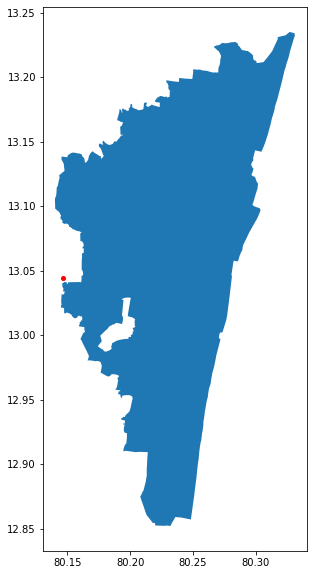

In [ ]:
gdf.plot(figsize=(10,10), edgecolor='')
plt.plot(x_coord, y_coord, marker="o", markersize=4, markeredgecolor="red", markerfacecolor="red")
plt.show()

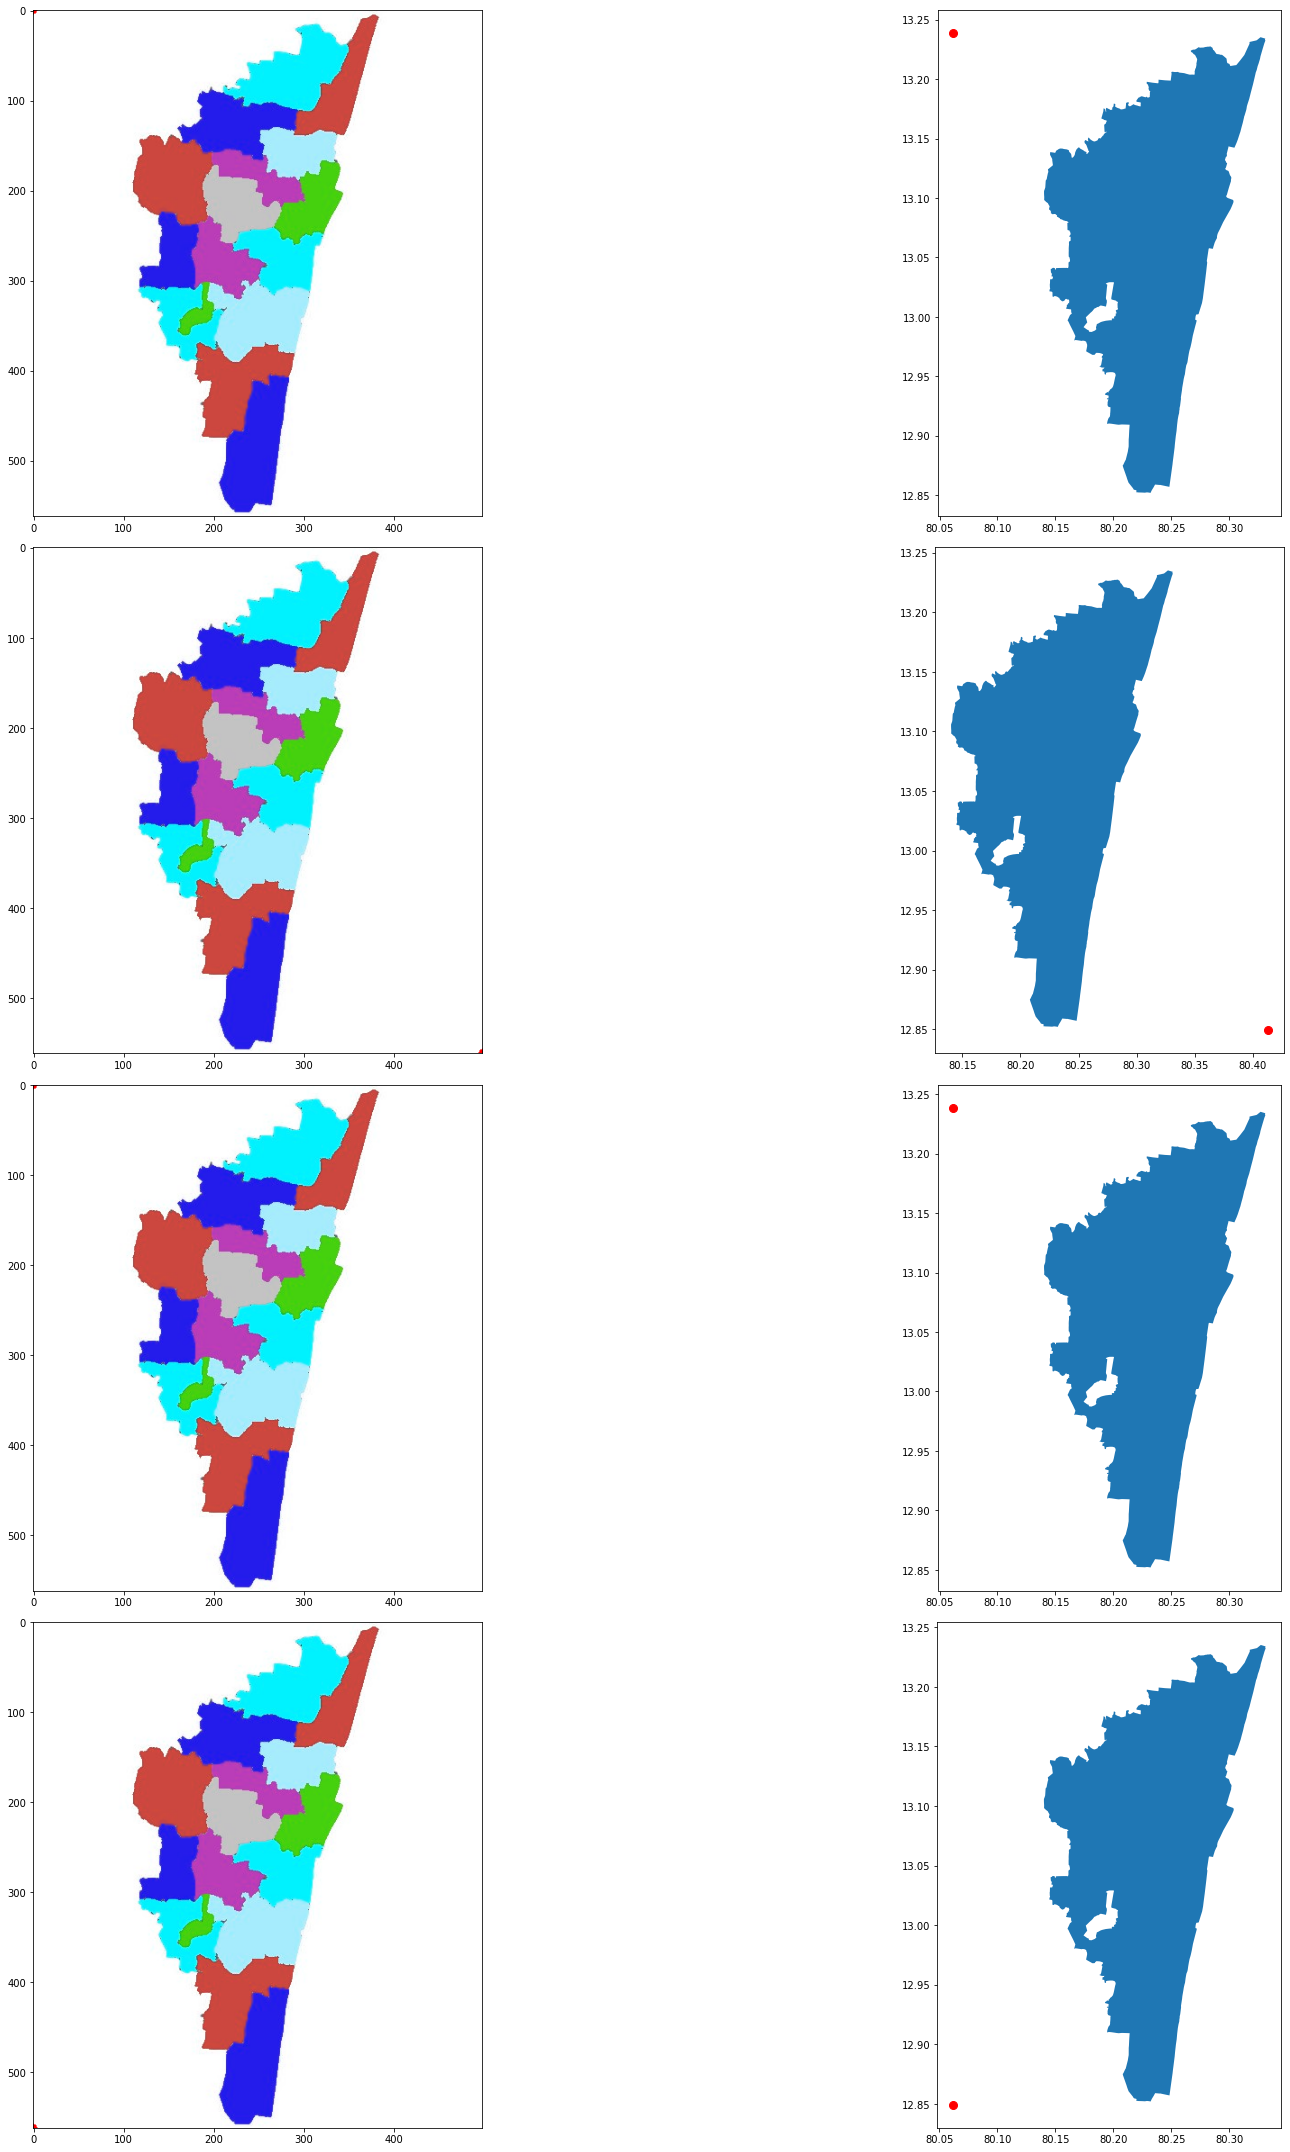

In [ ]:
def plot_mappings(coord_list):
    fig, axes = plt.subplots(4, 2, figsize=(30,30))
    axes = axes.flatten()
    
    #row1
    im = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
    (x,y) = coord_list[0]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[1].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[0].imshow(im)
    gdf.plot(ax=axes[1], figsize=(10,10))

    #row2
    im = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
    (x,y) = coord_list[1]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[3].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[2].imshow(im)
    gdf.plot(ax=axes[3], figsize=(10,10))

    #row3
    im = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
    (x,y) = coord_list[2]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[5].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[4].imshow(im)
    gdf.plot(ax=axes[5], figsize=(10,10))

    #row4
    im = cv2.imread('/content/drive/MyDrive/chennaibest.jpg')
    (x,y) = coord_list[3]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[7].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[6].imshow(im)
    gdf.plot(ax=axes[7], figsize=(10,10))

    plt.tight_layout()
    plt.show()

plot_mappings([(0, 0), (498, 561), (0, 0), (0, 561)])


# Mapping borders
1. Contour color based
2. mapping

#### Finding all the colours in the image

In [ ]:
# It is the number of colors you want to extract from the image
nb_colors = 10

# Returns a list of tuples form (r, g, b) 
image_colors = colorgram.extract("/content/drive/MyDrive/chennaibest.jpg", nb_colors)   
print(image_colors)

[<colorgram.py Color: Rgb(r=254, g=253, b=249), 75.54153225660465%>, <colorgram.py Color: Rgb(r=63, g=71, b=204), 5.599423620690279%>, <colorgram.py Color: Rgb(r=232, g=30, b=47), 5.430347529208166%>, <colorgram.py Color: Rgb(r=253, g=242, b=0), 3.76999858801551%>, <colorgram.py Color: Rgb(r=184, g=58, b=162), 2.5365034195367966%>, <colorgram.py Color: Rgb(r=248, g=242, b=246), 1.6824338268038104%>, <colorgram.py Color: Rgb(r=18, g=207, b=69), 1.679537448363003%>, <colorgram.py Color: Rgb(r=246, g=237, b=33), 1.5767160137143517%>, <colorgram.py Color: Rgb(r=239, g=247, b=243), 1.4427585108270247%>, <colorgram.py Color: Rgb(r=235, g=236, b=243), 0.7407487862364097%>]


In [ ]:
def render(color):
    w, h = 512, 512
    data = np.zeros((h, w, 3), dtype=np.uint8)
    r, g, b = color
    data[0:512, 0:512] = [r, g, b]
    img = Image.fromarray(data, 'RGB')
    return img

def plotImages(images_arr,x,y):
    fig, axes = plt.subplots(x, y, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

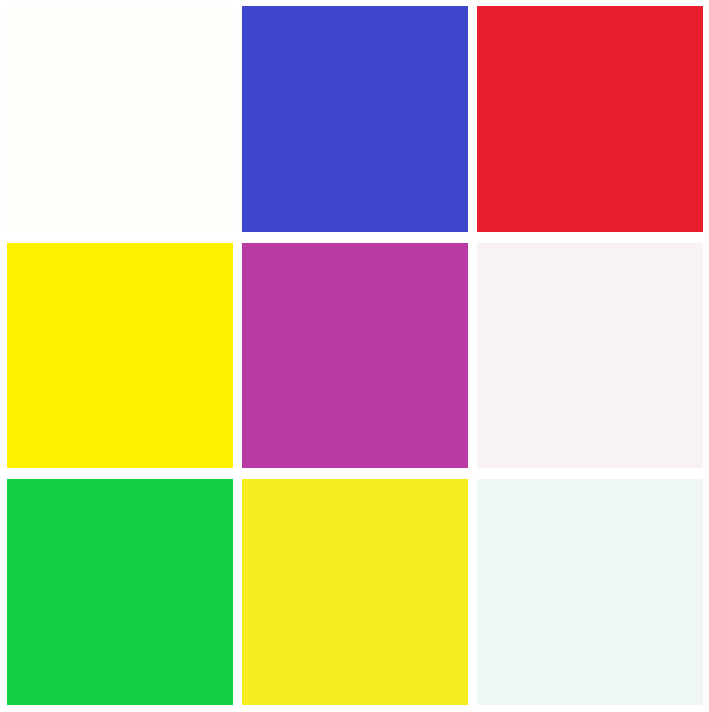

In [ ]:
img_ar = []
img_arr = []
img_list=[]
for i in range(len(image_colors)):
    img_ar.append((image_colors[i].rgb.r,image_colors[i].rgb.g,image_colors[i].rgb.b))
    img_list.append([image_colors[i].rgb.r,image_colors[i].rgb.g,image_colors[i].rgb.b])
img_arr = []
for i in range(len(img_ar)):
    img_arr.append(render(img_ar[i]))

plotImages(img_arr,3,3)

#### Creating mask for the image

In [ ]:
def find_mask(image, lower, upper):
    ''' Define the color of the region whose contours are to be detected '''
    return cv2.inRange(image, lower, upper)

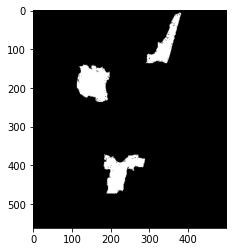

In [ ]:
BGR = np.array(img_list[1])
BGR=BGR[::-1] 
path = "/content/drive/MyDrive/chennaibest.jpg"

upper = BGR + 10
lower = BGR - 10
image = cv2.imread(path)

# Take the contours according to the given color only
mask = find_mask(image, lower, upper)

plt.imshow(mask, cmap="gray")

#### Manual extraction of the top left state

In [ ]:
(h,w) = mask.shape
for i in range(h):
  for j in range(w):
    if i>200:
      mask[i][j] = 0
    if j<220:
      mask[i][j] = 0
    else:
      pass

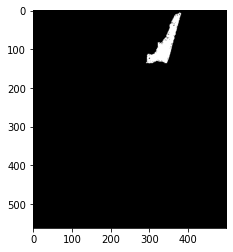

In [ ]:
plt.imshow(mask, cmap="gray")

#### Finding contours

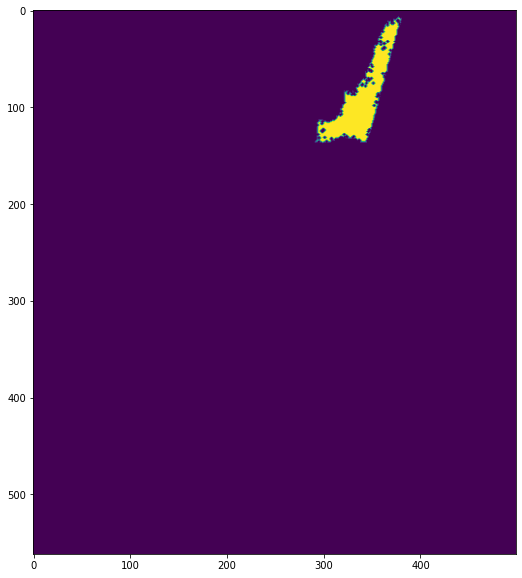

In [ ]:
mask_name="mask"+str(i)+".png"
image1= mask.copy()
# img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(image1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 1, cv2.LINE_AA)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(image_copy2)
image_copy3 = image1.copy()
contour1=0
for i, contour in enumerate(contours2): # loop over one contour area
    for j, contour_point in enumerate(contour): # loop over the points
        contour1=contour1+1
    # draw a circle on the current contour coordinate
        cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 1, (0, 255, 0), 10, cv2.LINE_AA)

In [ ]:
print(contours2[2])

[[[294 135]]

 [[295 134]]

 [[296 135]]

 [[295 136]]]


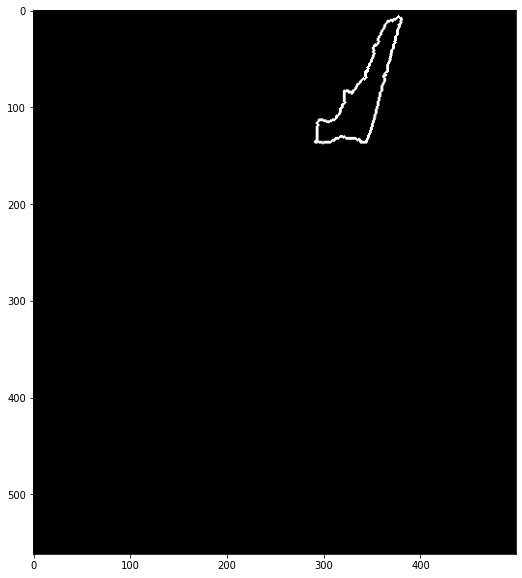

In [ ]:
im_new = np.zeros(mask.shape)
for i in contours2[0]:
  for j in i:
    cv2.circle(im_new, (j[0],j[1]), 1, (255, 255, 255), -1)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(im_new, cmap="gray")

#### Mapping

In [ ]:
ll = []
for i in contours2[0]:
  for j in i:
    x,y = map(j[0], j[1])
    ll.append((x,y))

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


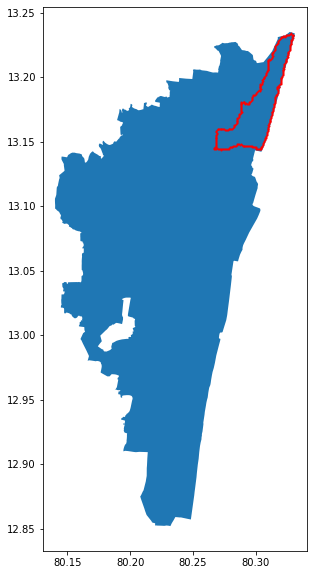

In [ ]:
gdf.plot(figsize=(10,10), edgecolor='')
for i in ll:
  plt.plot(i[0], i[1], marker="o", markersize=1, markeredgecolor="red", markerfacecolor="red")
plt.show()

#### Error offset handling

In [ ]:
ll

[(80.32769868185953, 13.234491218934467),
 (80.32699371164885, 13.233796992634293),
 (80.32628874143816, 13.23310276633412),
 (80.32558377122749, 13.232408540033948),
 (80.32487880101681, 13.232408540033948),
 (80.32417383080612, 13.232408540033948),
 (80.32417383080612, 13.231714313733775),
 (80.32346886059544, 13.2310200874336),
 (80.32276389038476, 13.231714313733775),
 (80.32205892017407, 13.231714313733775),
 (80.3213539499634, 13.2310200874336),
 (80.3206489797527, 13.2310200874336),
 (80.31994400954203, 13.2310200874336),
 (80.31994400954203, 13.230325861133428),
 (80.31923903933135, 13.229631634833256),
 (80.31853406912066, 13.228937408533081),
 (80.31782909890998, 13.228243182232909),
 (80.31782909890998, 13.227548955932736),
 (80.31782909890998, 13.226854729632564),
 (80.3171241286993, 13.22616050333239),
 (80.3171241286993, 13.225466277032217),
 (80.31641915848861, 13.224772050732044),
 (80.31571418827794, 13.22407782443187),
 (80.31571418827794, 13.223383598131697),
 (80.31

# Getting GeoJSON

In [ ]:
!pip install shapely-geojson
!pip install django

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 5.1 MB/s 


In [ ]:
from shapely.geometry import Polygon
from shapely_geojson import dumps, Feature
feature = Feature(Polygon(ll))
print(dumps(feature))

{"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[80.32769868185953, 13.234491218934467], [80.32699371164885, 13.233796992634293], [80.32628874143816, 13.23310276633412], [80.32558377122749, 13.232408540033948], [80.32487880101681, 13.232408540033948], [80.32417383080612, 13.232408540033948], [80.32417383080612, 13.231714313733775], [80.32346886059544, 13.2310200874336], [80.32276389038476, 13.231714313733775], [80.32205892017407, 13.231714313733775], [80.3213539499634, 13.2310200874336], [80.3206489797527, 13.2310200874336], [80.31994400954203, 13.2310200874336], [80.31994400954203, 13.230325861133428], [80.31923903933135, 13.229631634833256], [80.31853406912066, 13.228937408533081], [80.31782909890998, 13.228243182232909], [80.31782909890998, 13.227548955932736], [80.31782909890998, 13.226854729632564], [80.3171241286993, 13.22616050333239], [80.3171241286993, 13.225466277032217], [80.31641915848861, 13.224772050732044], [80.31571418827794, 13.22407782443187], [80

In [ ]:
from django.contrib.gis.geos import Polygon, Point, MultiPoint, GeometryCollection
ll.append(ll[0])
gc = GeometryCollection(Polygon(ll))
print(gc.geojson)

{ "type": "GeometryCollection", "geometries": [ { "type": "Polygon", "coordinates": [ [ [ 80.32769868185953, 13.234491218934467 ], [ 80.326993711648853, 13.233796992634293 ], [ 80.326288741438162, 13.23310276633412 ], [ 80.325583771227485, 13.232408540033948 ], [ 80.324878801016808, 13.232408540033948 ], [ 80.324173830806117, 13.232408540033948 ], [ 80.324173830806117, 13.231714313733775 ], [ 80.32346886059544, 13.231020087433601 ], [ 80.322763890384763, 13.231714313733775 ], [ 80.322058920174072, 13.231714313733775 ], [ 80.321353949963395, 13.231020087433601 ], [ 80.320648979752704, 13.231020087433601 ], [ 80.319944009542027, 13.231020087433601 ], [ 80.319944009542027, 13.230325861133428 ], [ 80.31923903933135, 13.229631634833256 ], [ 80.318534069120659, 13.228937408533081 ], [ 80.317829098909982, 13.228243182232909 ], [ 80.317829098909982, 13.227548955932736 ], [ 80.317829098909982, 13.226854729632564 ], [ 80.317124128699305, 13.226160503332389 ], [ 80.317124128699305, 13.22546627703

In [ ]:
og = { "type": "Feature", "properties": { "Zone_No": "I", "Zone Name": "Zone 1", "name": "Thiruvottiyur" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ 80.318696306538484, 13.188754753527951 ], [ 80.317295010404507, 13.183324342439148 ], [ 80.315649762560057, 13.178391491735239 ], [ 80.315271536351744, 13.177082241568824 ], [ 80.314901789848022, 13.174771048241437 ], [ 80.314524669688126, 13.173331109836569 ], [ 80.313303482908779, 13.169402833163199 ], [ 80.31296408658342, 13.168616599037216 ], [ 80.312702383450215, 13.167361195507995 ], [ 80.312673105894632, 13.167220749552596 ], [ 80.311712365284464, 13.16318514453568 ], [ 80.310656798090633, 13.159473460394574 ], [ 80.310620203370576, 13.159344782615564 ], [ 80.309656328956422, 13.155679460940858 ], [ 80.309064781825498, 13.154020393370422 ], [ 80.307419533981047, 13.149087542666512 ], [ 80.306339081946447, 13.146336219693774 ], [ 80.304507768386983, 13.142253520696409 ], [ 80.299286260241402, 13.143379429080179 ], [ 80.298820860344733, 13.143592094529341 ], [ 80.297571250846104, 13.143764074101435 ], [ 80.295747134672794, 13.144399467705567 ], [ 80.294963414425695, 13.144518355683607 ], [ 80.293926058009816, 13.144675719496876 ], [ 80.29314276026092, 13.14452729107621 ], [ 80.292325018609375, 13.144234989035416 ], [ 80.291397258326285, 13.144301178121095 ], [ 80.29051494380947, 13.144475391714069 ], [ 80.289845982994194, 13.14480275318258 ], [ 80.287542726139876, 13.145929870838588 ], [ 80.286755477027668, 13.146248326774254 ], [ 80.285935607718699, 13.146207424002062 ], [ 80.284903603874184, 13.145949734770509 ], [ 80.284050810417526, 13.145585387471778 ], [ 80.282597880963266, 13.144499069328338 ], [ 80.279121162792308, 13.142358876899282 ], [ 80.278267457482571, 13.142102272143971 ], [ 80.265958719936307, 13.14148866549146 ], [ 80.265316845211103, 13.14148476137674 ], [ 80.265065707507233, 13.141662814015861 ], [ 80.265133987410834, 13.142022389618932 ], [ 80.265715278444802, 13.144971039700811 ], [ 80.265604347960448, 13.145437273371504 ], [ 80.266507509877087, 13.145433454562058 ], [ 80.266603980429423, 13.145556804299149 ], [ 80.266479807960323, 13.145826127567547 ], [ 80.266452729396391, 13.146145146583196 ], [ 80.266548992164289, 13.146293047650234 ], [ 80.266719633743193, 13.146294085554219 ], [ 80.267182803742969, 13.146296902721962 ], [ 80.267327405679353, 13.146494202992573 ], [ 80.267785173287891, 13.147135354736269 ], [ 80.267925203970222, 13.147872784263312 ], [ 80.267971673080027, 13.148143145435428 ], [ 80.268140860168984, 13.148316042648242 ], [ 80.268310462826506, 13.148439837201428 ], [ 80.268403608830482, 13.148956008215981 ], [ 80.268303605945491, 13.149250031086121 ], [ 80.268205473119096, 13.149323091987538 ], [ 80.266255283646515, 13.149311230228408 ], [ 80.266156527467189, 13.149457945119488 ], [ 80.266251543529677, 13.149753154165586 ], [ 80.267468192931702, 13.152903286256143 ], [ 80.267655108292402, 13.153861974295674 ], [ 80.267689110345927, 13.155605415258117 ], [ 80.267874363432398, 13.156760513936335 ], [ 80.268469319352391, 13.161355467687693 ], [ 80.269980923977784, 13.161340109221106 ], [ 80.277549959671816, 13.159962096407648 ], [ 80.277619767228785, 13.160355362500939 ], [ 80.278872971749038, 13.160338432351212 ], [ 80.27950387434791, 13.160686006040864 ], [ 80.282598620038641, 13.163724798425521 ], [ 80.284751441909549, 13.168599306212355 ], [ 80.286639956737091, 13.173017983405297 ], [ 80.286806650414803, 13.17348549657614 ], [ 80.286872925638946, 13.174296135276661 ], [ 80.286772922754224, 13.17459015814689 ], [ 80.286744181916163, 13.175105587801491 ], [ 80.286712324313996, 13.175989287403608 ], [ 80.286289248720152, 13.179890576495742 ], [ 80.286164118851914, 13.182001338465041 ], [ 80.290897276224172, 13.181563627964307 ], [ 80.293904835046334, 13.180501606906278 ], [ 80.295562354922353, 13.183408894594114 ], [ 80.297248407852166, 13.185825303957651 ], [ 80.298610816917375, 13.187883732193603 ], [ 80.29949006445419, 13.187692659346547 ], [ 80.300227685643293, 13.189833221474098 ], [ 80.302403779352616, 13.191957980319321 ], [ 80.302441417630973, 13.193271773009515 ], [ 80.303300717877661, 13.195437627826875 ], [ 80.303872060957531, 13.197061574123778 ], [ 80.304744036044866, 13.197729797821131 ], [ 80.304181278728834, 13.197971900863722 ], [ 80.305014442897601, 13.199769307807093 ], [ 80.306766147698994, 13.203070009860459 ], [ 80.308779146671839, 13.207182536790482 ], [ 80.308089997868564, 13.210836681592427 ], [ 80.310873306769608, 13.216107865728452 ], [ 80.312384306433231, 13.218756459994138 ], [ 80.313067082149104, 13.220207678128867 ], [ 80.31609143209603, 13.226635838046027 ], [ 80.317545477000863, 13.229676927390818 ], [ 80.317557179528606, 13.231174706782797 ], [ 80.323421320532773, 13.232487109483889 ], [ 80.323979714379135, 13.232760584367961 ], [ 80.327055277308176, 13.23518544523464 ], [ 80.33113647926163, 13.234007191494909 ], [ 80.331065424998982, 13.233761233380678 ], [ 80.330898315752805, 13.233342822869551 ], [ 80.330876016227023, 13.233097161299087 ], [ 80.331223532912944, 13.232362697211849 ], [ 80.330269424388135, 13.229877082018534 ], [ 80.329296756454383, 13.226703881318111 ], [ 80.328916899989167, 13.225498493804219 ], [ 80.327802746883307, 13.221759722885492 ], [ 80.326996772627254, 13.219054035355734 ], [ 80.326795293434188, 13.217993005704129 ], [ 80.32660001902741, 13.216964651695692 ], [ 80.32588781412818, 13.214701481191002 ], [ 80.325318341106637, 13.212856572925554 ], [ 80.324579265427758, 13.210887870106832 ], [ 80.324060209417325, 13.208846847746466 ], [ 80.323753692841564, 13.207617353718634 ], [ 80.32294210841026, 13.205574552094598 ], [ 80.322732449808754, 13.204650206855048 ], [ 80.322613084524519, 13.204123947826337 ], [ 80.321812720443816, 13.200755374391035 ], [ 80.320540392815403, 13.195542485778175 ], [ 80.318696306538484, 13.188754753527951 ] ] ] } }

In [ ]:
pred = {"type": "Feature", "geometry": {"type": "Polygon", "coordinates": [[[80.32769868185953, 13.234491218934467], [80.32699371164885, 13.233796992634293], [80.32628874143816, 13.23310276633412], [80.32558377122749, 13.232408540033948], [80.32487880101681, 13.232408540033948], [80.32417383080612, 13.232408540033948], [80.32417383080612, 13.231714313733775], [80.32346886059544, 13.2310200874336], [80.32276389038476, 13.231714313733775], [80.32205892017407, 13.231714313733775], [80.3213539499634, 13.2310200874336], [80.3206489797527, 13.2310200874336], [80.31994400954203, 13.2310200874336], [80.31994400954203, 13.230325861133428], [80.31923903933135, 13.229631634833256], [80.31853406912066, 13.228937408533081], [80.31782909890998, 13.228243182232909], [80.31782909890998, 13.227548955932736], [80.31782909890998, 13.226854729632564], [80.3171241286993, 13.22616050333239], [80.3171241286993, 13.225466277032217], [80.31641915848861, 13.224772050732044], [80.31571418827794, 13.22407782443187], [80.31571418827794, 13.223383598131697], [80.31500921806725, 13.222689371831525], [80.31500921806725, 13.221995145531352], [80.31500921806725, 13.221300919231178], [80.31430424785657, 13.220606692931005], [80.31359927764589, 13.219912466630833], [80.31359927764589, 13.219218240330658], [80.3128943074352, 13.218524014030486], [80.3128943074352, 13.217829787730313], [80.3128943074352, 13.21713556143014], [80.31359927764589, 13.216441335129966], [80.3128943074352, 13.215747108829794], [80.3128943074352, 13.215052882529621], [80.31218933722452, 13.214358656229447], [80.31148436701385, 13.213664429929274], [80.31077939680316, 13.214358656229447], [80.31007442659248, 13.213664429929274], [80.31007442659248, 13.212970203629101], [80.30936945638179, 13.212275977328929], [80.30936945638179, 13.211581751028755], [80.30936945638179, 13.210887524728582], [80.31007442659248, 13.21019329842841], [80.30936945638179, 13.209499072128235], [80.30936945638179, 13.208804845828062], [80.31007442659248, 13.20811061952789], [80.31007442659248, 13.207416393227717], [80.30936945638179, 13.206722166927543], [80.30936945638179, 13.20602794062737], [80.30936945638179, 13.205333714327198], [80.30866448617111, 13.204639488027023], [80.30866448617111, 13.203945261726851], [80.30795951596043, 13.203251035426678], [80.30795951596043, 13.202556809126506], [80.30795951596043, 13.201862582826331], [80.30725454574974, 13.201168356526159], [80.30654957553907, 13.200474130225986], [80.30654957553907, 13.199779903925812], [80.30654957553907, 13.19908567762564], [80.30584460532839, 13.198391451325467], [80.3051396351177, 13.197697225025294], [80.30584460532839, 13.19700299872512], [80.3051396351177, 13.196308772424947], [80.3051396351177, 13.195614546124775], [80.3051396351177, 13.1949203198246], [80.30443466490702, 13.194226093524428], [80.30372969469633, 13.1949203198246], [80.30372969469633, 13.194226093524428], [80.30372969469633, 13.193531867224255], [80.30372969469633, 13.192837640924083], [80.30372969469633, 13.192143414623908], [80.30372969469633, 13.191449188323736], [80.30443466490702, 13.190754962023563], [80.30372969469633, 13.190060735723389], [80.30302472448565, 13.189366509423216], [80.30231975427498, 13.190060735723389], [80.30161478406428, 13.189366509423216], [80.30090981385361, 13.188672283123044], [80.30020484364293, 13.187978056822871], [80.30020484364293, 13.187283830522697], [80.29949987343224, 13.186589604222524], [80.29879490322156, 13.185895377922352], [80.29808993301087, 13.185895377922352], [80.29808993301087, 13.185201151622177], [80.2973849628002, 13.184506925322005], [80.2973849628002, 13.183812699021832], [80.29667999258952, 13.18311847272166], [80.29667999258952, 13.182424246421485], [80.29597502237883, 13.181730020121313], [80.29527005216815, 13.18103579382114], [80.29456508195747, 13.18103579382114], [80.29456508195747, 13.180341567520966], [80.29456508195747, 13.179647341220793], [80.29386011174678, 13.17895311492062], [80.2931551415361, 13.179647341220793], [80.29245017132543, 13.180341567520966], [80.29174520111474, 13.179647341220793], [80.29104023090406, 13.180341567520966], [80.29104023090406, 13.18103579382114], [80.29033526069337, 13.18103579382114], [80.28963029048269, 13.18103579382114], [80.28892532027201, 13.180341567520966], [80.28822035006132, 13.18103579382114], [80.28822035006132, 13.180341567520966], [80.28822035006132, 13.179647341220793], [80.28822035006132, 13.17895311492062], [80.28822035006132, 13.178258888620448], [80.28822035006132, 13.177564662320274], [80.28822035006132, 13.176870436020101], [80.28822035006132, 13.176176209719928], [80.28822035006132, 13.175481983419754], [80.28822035006132, 13.174787757119581], [80.28822035006132, 13.174093530819409], [80.28822035006132, 13.173399304519236], [80.28892532027201, 13.172705078219062], [80.28822035006132, 13.17201085191889], [80.28751537985065, 13.171316625618717], [80.28681040963997, 13.171316625618717], [80.28681040963997, 13.170622399318543], [80.28681040963997, 13.16992817301837], [80.28681040963997, 13.169233946718197], [80.28610543942928, 13.168539720418025], [80.2854004692186, 13.168539720418025], [80.2854004692186, 13.16784549411785], [80.2854004692186, 13.167151267817678], [80.2854004692186, 13.166457041517505], [80.2854004692186, 13.165762815217331], [80.28469549900791, 13.165068588917158], [80.28469549900791, 13.164374362616986], [80.28399052879723, 13.163680136316813], [80.28328555858656, 13.162985910016639], [80.28258058837586, 13.162985910016639], [80.28258058837586, 13.162291683716466], [80.28258058837586, 13.161597457416294], [80.28187561816519, 13.16090323111612], [80.28117064795451, 13.160209004815947], [80.28046567774382, 13.160209004815947], [80.27976070753314, 13.160209004815947], [80.27905573732245, 13.159514778515774], [80.27835076711177, 13.159514778515774], [80.2776457969011, 13.158820552215602], [80.2769408266904, 13.158820552215602], [80.27623585647973, 13.158820552215602], [80.27553088626905, 13.158820552215602], [80.27482591605836, 13.159514778515774], [80.27412094584768, 13.159514778515774], [80.273415975637, 13.159514778515774], [80.27271100542632, 13.160209004815947], [80.27200603521564, 13.160209004815947], [80.27130106500495, 13.160209004815947], [80.27059609479427, 13.160209004815947], [80.2698911245836, 13.160209004815947], [80.2698911245836, 13.159514778515774], [80.2691861543729, 13.158820552215602], [80.26848118416223, 13.158126325915427], [80.26848118416223, 13.157432099615255], [80.2691861543729, 13.156737873315082], [80.2691861543729, 13.156043647014908], [80.26848118416223, 13.155349420714735], [80.26848118416223, 13.154655194414563], [80.26848118416223, 13.15396096811439], [80.26848118416223, 13.153266741814216], [80.26848118416223, 13.152572515514043], [80.26848118416223, 13.15187828921387], [80.26848118416223, 13.151184062913696], [80.26848118416223, 13.150489836613524], [80.26848118416223, 13.149795610313351], [80.26848118416223, 13.149101384013179], [80.26848118416223, 13.148407157713004], [80.26848118416223, 13.147712931412832], [80.26848118416223, 13.147018705112659], [80.26848118416223, 13.146324478812485], [80.26777621395154, 13.145630252512312], [80.26707124374086, 13.14493602621214], [80.26707124374086, 13.144241799911967], [80.26777621395154, 13.144241799911967], [80.26848118416223, 13.144241799911967], [80.2691861543729, 13.14493602621214], [80.2698911245836, 13.144241799911967], [80.27059609479427, 13.144241799911967], [80.27130106500495, 13.144241799911967], [80.27200603521564, 13.144241799911967], [80.27271100542632, 13.143547573611793], [80.273415975637, 13.144241799911967], [80.27412094584768, 13.144241799911967], [80.27482591605836, 13.144241799911967], [80.27553088626905, 13.144241799911967], [80.27623585647973, 13.144241799911967], [80.2769408266904, 13.144241799911967], [80.2776457969011, 13.144241799911967], [80.27835076711177, 13.144241799911967], [80.27905573732245, 13.14493602621214], [80.27976070753314, 13.145630252512312], [80.28046567774382, 13.145630252512312], [80.28117064795451, 13.145630252512312], [80.28117064795451, 13.146324478812485], [80.28187561816519, 13.147018705112659], [80.28258058837586, 13.147018705112659], [80.28328555858656, 13.147018705112659], [80.28399052879723, 13.147018705112659], [80.28469549900791, 13.147712931412832], [80.2854004692186, 13.148407157713004], [80.28610543942928, 13.148407157713004], [80.28681040963997, 13.148407157713004], [80.28751537985065, 13.147712931412832], [80.28822035006132, 13.148407157713004], [80.28892532027201, 13.147712931412832], [80.28963029048269, 13.147018705112659], [80.29033526069337, 13.147018705112659], [80.29104023090406, 13.147018705112659], [80.29174520111474, 13.147018705112659], [80.29245017132543, 13.147018705112659], [80.2931551415361, 13.147018705112659], [80.29386011174678, 13.147018705112659], [80.29456508195747, 13.147018705112659], [80.29527005216815, 13.147018705112659], [80.29597502237883, 13.147018705112659], [80.29667999258952, 13.147018705112659], [80.2973849628002, 13.146324478812485], [80.29808993301087, 13.145630252512312], [80.29879490322156, 13.146324478812485], [80.29949987343224, 13.146324478812485], [80.30020484364293, 13.145630252512312], [80.30020484364293, 13.14493602621214], [80.30020484364293, 13.144241799911967], [80.30090981385361, 13.144241799911967], [80.30161478406428, 13.144241799911967], [80.30231975427498, 13.144241799911967], [80.30302472448565, 13.144241799911967], [80.30372969469633, 13.144241799911967], [80.30443466490702, 13.144241799911967], [80.30443466490702, 13.14493602621214], [80.30443466490702, 13.145630252512312], [80.3051396351177, 13.146324478812485], [80.3051396351177, 13.147018705112659], [80.30584460532839, 13.147712931412832], [80.30584460532839, 13.148407157713004], [80.30584460532839, 13.149101384013179], [80.30654957553907, 13.149795610313351], [80.30654957553907, 13.150489836613524], [80.30725454574974, 13.151184062913696], [80.30725454574974, 13.15187828921387], [80.30725454574974, 13.152572515514043], [80.30795951596043, 13.153266741814216], [80.30795951596043, 13.15396096811439], [80.30795951596043, 13.154655194414563], [80.30866448617111, 13.155349420714735], [80.30866448617111, 13.156043647014908], [80.30866448617111, 13.156737873315082], [80.30866448617111, 13.157432099615255], [80.30936945638179, 13.158126325915427], [80.30936945638179, 13.158820552215602], [80.30936945638179, 13.159514778515774], [80.31007442659248, 13.160209004815947], [80.31007442659248, 13.16090323111612], [80.31007442659248, 13.161597457416294], [80.31077939680316, 13.162291683716466], [80.31007442659248, 13.162985910016639], [80.31077939680316, 13.163680136316813], [80.31077939680316, 13.164374362616986], [80.31148436701385, 13.165068588917158], [80.31148436701385, 13.165762815217331], [80.31148436701385, 13.166457041517505], [80.31148436701385, 13.167151267817678], [80.31148436701385, 13.16784549411785], [80.31218933722452, 13.168539720418025], [80.31218933722452, 13.169233946718197], [80.31218933722452, 13.16992817301837], [80.3128943074352, 13.170622399318543], [80.3128943074352, 13.171316625618717], [80.3128943074352, 13.17201085191889], [80.3128943074352, 13.172705078219062], [80.3128943074352, 13.173399304519236], [80.31359927764589, 13.174093530819409], [80.31359927764589, 13.174787757119581], [80.31359927764589, 13.175481983419754], [80.31359927764589, 13.176176209719928], [80.31430424785657, 13.176870436020101], [80.31430424785657, 13.177564662320274], [80.31430424785657, 13.178258888620448], [80.31430424785657, 13.17895311492062], [80.31430424785657, 13.179647341220793], [80.31500921806725, 13.180341567520966], [80.31571418827794, 13.18103579382114], [80.31571418827794, 13.181730020121313], [80.31571418827794, 13.182424246421485], [80.31571418827794, 13.18311847272166], [80.31571418827794, 13.183812699021832], [80.31571418827794, 13.184506925322005], [80.31641915848861, 13.185201151622177], [80.31641915848861, 13.185895377922352], [80.3171241286993, 13.186589604222524], [80.3171241286993, 13.187283830522697], [80.31782909890998, 13.187978056822871], [80.31782909890998, 13.188672283123044], [80.31782909890998, 13.189366509423216], [80.31782909890998, 13.190060735723389], [80.3171241286993, 13.190754962023563], [80.3171241286993, 13.191449188323736], [80.3171241286993, 13.192143414623908], [80.31782909890998, 13.192837640924083], [80.31853406912066, 13.192143414623908], [80.31853406912066, 13.192837640924083], [80.31782909890998, 13.193531867224255], [80.31853406912066, 13.194226093524428], [80.31923903933135, 13.1949203198246], [80.31994400954203, 13.1949203198246], [80.31994400954203, 13.195614546124775], [80.31994400954203, 13.196308772424947], [80.31994400954203, 13.19700299872512], [80.31994400954203, 13.197697225025294], [80.31994400954203, 13.198391451325467], [80.31994400954203, 13.19908567762564], [80.31994400954203, 13.199779903925812], [80.3206489797527, 13.200474130225986], [80.3206489797527, 13.201168356526159], [80.3213539499634, 13.201862582826331], [80.3213539499634, 13.202556809126506], [80.32205892017407, 13.203251035426678], [80.3213539499634, 13.203945261726851], [80.32205892017407, 13.204639488027023], [80.32205892017407, 13.205333714327198], [80.32205892017407, 13.20602794062737], [80.32276389038476, 13.206722166927543], [80.32205892017407, 13.207416393227717], [80.32276389038476, 13.20811061952789], [80.32276389038476, 13.208804845828062], [80.32276389038476, 13.209499072128235], [80.32276389038476, 13.21019329842841], [80.32346886059544, 13.210887524728582], [80.32417383080612, 13.211581751028755], [80.32417383080612, 13.212275977328929], [80.32417383080612, 13.212970203629101], [80.32417383080612, 13.213664429929274], [80.32417383080612, 13.214358656229447], [80.32487880101681, 13.215052882529621], [80.32558377122749, 13.215747108829794], [80.32487880101681, 13.216441335129966], [80.32558377122749, 13.21713556143014], [80.32558377122749, 13.217829787730313], [80.32558377122749, 13.218524014030486], [80.32558377122749, 13.219218240330658], [80.32558377122749, 13.219912466630833], [80.32628874143816, 13.220606692931005], [80.32699371164885, 13.221300919231178], [80.32699371164885, 13.221995145531352], [80.32699371164885, 13.222689371831525], [80.32699371164885, 13.223383598131697], [80.32699371164885, 13.22407782443187], [80.32699371164885, 13.224772050732044], [80.32769868185953, 13.225466277032217], [80.32769868185953, 13.22616050333239], [80.32840365207022, 13.226854729632564], [80.32840365207022, 13.227548955932736], [80.32769868185953, 13.228243182232909], [80.32840365207022, 13.228937408533081], [80.3291086222809, 13.228937408533081], [80.3291086222809, 13.229631634833256], [80.32981359249158, 13.230325861133428], [80.3291086222809, 13.2310200874336], [80.32981359249158, 13.231714313733775], [80.32981359249158, 13.232408540033948], [80.32981359249158, 13.23310276633412], [80.3291086222809, 13.23310276633412], [80.32840365207022, 13.233796992634293], [80.32769868185953, 13.234491218934467]]]}, "properties": {}}

In [ ]:
def get_xy(coords):
  xxx = []
  yyy = []

  for i in coords:
    xxx.append(i[0])
    yyy.append(i[1])
  return xxx,yyy 

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [ ]:
ogx,ogy = get_xy(og["geometry"]["coordinates"][0])
predx,predy = get_xy(pred["geometry"]["coordinates"][0])

In [ ]:
print((PolyArea(ogx,ogy) - PolyArea(predx,predy))/PolyArea(ogx,ogy))

0.16606465750732197


0.0017890340823214501

In [ ]:
from shapely.geometry import Polygon
pgon = Polygon(zip(xxx, yyy))
print(pgon.area)

In [ ]:
0.0015259768288916839 - 0.0015259768288916839

0.0